In [1]:
import fxcmpy

In [3]:
api = fxcmpy.fxcmpy(access_token='4bce93fe715889eeed2e95938a007c780b213b58',
                   log_level='error')

|ERROR|2020-01-14 14:20:25,393|Socket returns unknown error.


ServerError: Can not connect to FXCM Server.

In [3]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [4]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [5]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [6]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [7]:
start = pd.datetime(2018, 6, 25)
stop= pd.datetime(2018, 6, 30)

td = tdr('EURUSD', start, stop)

In [8]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [9]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9 MB


In [10]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [11]:
sub = td.get_data(start='2018-06-29 12:00', end='2018-06-29 12:15')

In [12]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [13]:
sub['Mid'] = sub.mean(axis=1)

In [14]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()

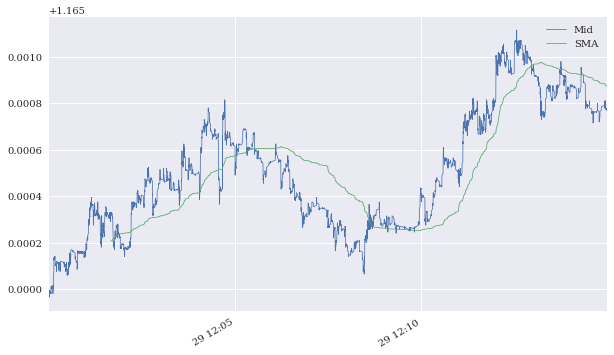

In [15]:
sub[['Mid', 'SMA']].plot(figsize=(10,6), lw=0.75)

In [16]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [17]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [18]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

In [19]:
period = 'H1'

In [20]:
candles = cdr('EURUSD', start, stop, period)

In [21]:
data = candles.get_data()

In [22]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [23]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [24]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [25]:
data['SMA1'] = data['MidClose'].rolling(30).mean()

In [26]:
data['SMA2'] = data['MidClose'].rolling(200).mean()

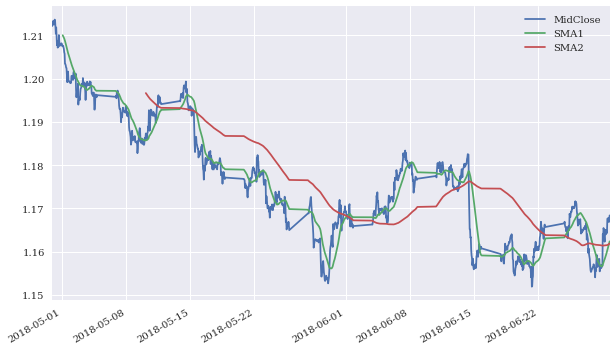

In [27]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10,6))

In [28]:
#working with API

In [29]:
instruments = api.get_instruments()

In [30]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


In [31]:
candles = api.get_candles('USD/JPY', period='D1', number=10)

In [32]:
candles[candles.columns[:4]]

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2019-10-11 21:00:00,107.953,108.437,108.627,107.840
2019-10-13 21:00:00,108.437,108.324,108.395,108.291
2019-10-14 21:00:00,108.324,108.396,108.522,108.031
2019-10-15 21:00:00,108.396,108.850,108.899,108.156
2019-10-16 21:00:00,108.850,108.767,108.865,108.558
2019-10-17 21:00:00,108.767,108.632,108.939,108.451
2019-10-18 21:00:00,108.632,108.383,108.722,108.377
2019-10-20 21:00:00,108.484,108.405,108.527,108.399
2019-10-21 21:00:00,108.405,108.608,108.664,108.291


In [33]:
candles[candles.columns[4:]]

,askopen,askclose,askhigh,asklow,tickqty
date,,,,,
2019-10-11 21:00:00,108.001,108.453,108.634,107.849,313830
2019-10-13 21:00:00,108.453,108.384,108.421,108.299,362
2019-10-14 21:00:00,108.384,108.405,108.524,108.034,170826
2019-10-15 21:00:00,108.405,108.863,108.900,108.155,210829
2019-10-16 21:00:00,108.863,108.783,108.872,108.565,239413
2019-10-17 21:00:00,108.783,108.687,108.938,108.454,239343
2019-10-18 21:00:00,108.687,108.419,108.723,108.387,199458
2019-10-20 21:00:00,108.545,108.464,108.589,108.460,66
2019-10-21 21:00:00,108.464,108.616,108.665,108.297,189374


In [34]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2018, 1, 1)

In [35]:
candles = api.get_candles('EUR/JPY', period='D1',
                          start=start, stop=end)

In [36]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305 entries, 2017-01-03 22:00:00 to 2018-01-01 22:00:00
Data columns (total 9 columns):
bidopen     305 non-null float64
bidclose    305 non-null float64
bidhigh     305 non-null float64
bidlow      305 non-null float64
askopen     305 non-null float64
askclose    305 non-null float64
askhigh     305 non-null float64
asklow      305 non-null float64
tickqty     305 non-null int64
dtypes: float64(8), int64(1)
memory usage: 23.8 KB


In [37]:
candles = api.get_candles('EUR/USD', period='m1', number=250)

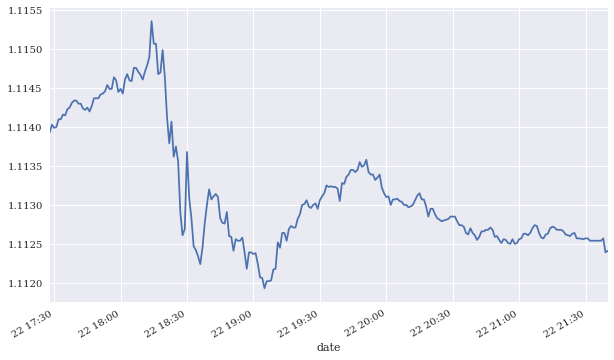

In [38]:
candles['askclose'].plot(figsize=(10,6))

In [39]:
#streaming data

In [40]:
def output(data, dataframe):
    print('3%d | %s |%s | %6.5f, %6.5f'
         % (len(dataframe), data['Symbol'],
           pd.to_datetime(int(data['Updated']), unit='ms'),
           data['Rates'][0], data['Rates'][1]))

In [41]:
api.subscribe_market_data('EUR/USD', (output,))

In [42]:
api.get_last_price('EUR/USD')

Bid     1.11233
Ask     1.11239
High    1.11280
Low     1.11231
Name: 2019-10-22 21:41:06.499000, dtype: float64

32 | EUR/USD |2019-10-22 21:41:41.744000 | 1.11234, 1.11240
33 | EUR/USD |2019-10-22 21:41:41.948000 | 1.11234, 1.11241
34 | EUR/USD |2019-10-22 21:41:51.489000 | 1.11235, 1.11242
35 | EUR/USD |2019-10-22 21:41:53.108000 | 1.11235, 1.11241
36 | EUR/USD |2019-10-22 21:41:54.729000 | 1.11234, 1.11241
37 | EUR/USD |2019-10-22 21:41:54.934000 | 1.11235, 1.11241
38 | EUR/USD |2019-10-22 21:42:25.808000 | 1.11234, 1.11241
39 | EUR/USD |2019-10-22 21:42:25.882000 | 1.11233, 1.11241
310 | EUR/USD |2019-10-22 21:42:35.780000 | 1.11233, 1.11242
311 | EUR/USD |2019-10-22 21:42:36.705000 | 1.11233, 1.11241
312 | EUR/USD |2019-10-22 21:42:37.205000 | 1.11233, 1.11242
313 | EUR/USD |2019-10-22 21:42:37.705000 | 1.11233, 1.11243
314 | EUR/USD |2019-10-22 21:42:38.205000 | 1.11233, 1.11242
315 | EUR/USD |2019-10-22 21:42:39.267000 | 1.11233, 1.11242
316 | EUR/USD |2019-10-22 21:42:41.879000 | 1.11234, 1.11243
317 | EUR/USD |2019-10-22 21:42:42.937000 | 1.11235, 1.11244
318 | EUR/USD |2019-10-22 21:42:

In [43]:
api.unsubscribe_market_data('EUR/USD')

In [44]:
#placing order

In [45]:
api.get_open_positions()

""


In [46]:
order = api.create_market_buy_order('EUR/USD', 10)

In [51]:
sel = ['tradeId', 'amountK', 'currency',
      'grossPL', 'isBuy']

In [52]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,209734544,10,EUR/USD,-1.4,True


In [53]:
order = api.create_market_buy_order('EUR/GBP', 5)

In [54]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,209734544,10,EUR/USD,-1.50,True
1,209734597,5,EUR/USD,-0.65,True


In [55]:
order = api.create_market_sell_order('EUR/USD', 3)

In [58]:
order = api.create_market_buy_order('EUR/GBP', 5)

In [59]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,209734544,10,EUR/USD,-1.40000,True
1,209734597,5,EUR/USD,-0.60000,True
2,209734607,3,EUR/USD,-0.42000,False
3,209734608,5,EUR/USD,-0.75000,True
4,209734610,5,EUR/GBP,-2.12356,True


In [60]:
api.close_all_for_symbol('EUR/USD')

In [61]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,209734610,5,EUR/GBP,-1.86614,True


In [62]:
api.close_all()

In [63]:
api.get_open_positions()

""


In [64]:
api.get_default_account()

3325931

In [68]:
api.get_accounts().T

,0
t,6
ratePrecision,0
accountId,3325931
balance,49992.6
usdMr,0
mc,N
mcDate,
accountName,03325931
usdMr3,0
hedging,Y
